# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [Basketball Courts Data](https://www.data.act.gov.au/api/views/igti-4f4a/rows.csv)

[Bike Crash Data](https://www.data.act.gov.au/api/views/n2kg-qkwj/rows.csv)

`imports`, you've seen this before!

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [107]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [108]:
plt.rcParams['figure.figsize'] = (10, 5)

In [109]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [110]:
if os.path.isfile("Basketball_Courts.csv"):
    filepath = "Basketball_Courts.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/api/views/igti-4f4a/rows.csv"
    print("loading from the internet")

basketball_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [111]:
if os.path.isfile("Cyclist_Crashes.csv"):
    filepath = "Cyclist_Crashes.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/api/views/n2kg-qkwj/rows.csv"
    print("loading from the internet")

Cyclist_Crashes_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [112]:
basketball_data.head()

,ID,TYPE,DIVISION,LOCATION,IMAGE_LINK,VIDEO_LINK,LATITUDE,LONGITUDE,Location_1
0,Bskt45,Double Court,Wright,Porter Street Neighbourhood Park,NaN,NaN,-35.311400,149.028152,"(-35.3114, 149.028152)"
1,Bskt2,Single Court,Ainslie,Corroboree Park,NaN,NaN,-35.268338,149.141855,"(-35.268338, 149.141855)"
2,Bskt14,Single Court,Deakin,Lawley Street - Neighbourhood Park,NaN,NaN,-35.319147,149.100659,"(-35.319147, 149.100659)"
3,Bskt11,Single Court,Flynn,Blackwell Circuit Neighbourhood Park,NaN,NaN,-35.206624,149.038999,"(-35.206624, 149.038999)"
4,Bskt39,Single Court,Nicholls,Lyrebird Place Pedestrian Parkland,NaN,NaN,-35.193455,149.106676,"(-35.193455, 149.106676)"


In [113]:
Cyclist_Crashes_data.head()

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LATITUDE,LONGITUDE,LOCATION_1
0,1212158,02 August 2019,12:00,Injury,Other - Vehicle to Vehicle,1,1,FAWKNER STREET (FARRER -> ELOUERA),-35.272927,149.135539,"(-35.272927, 149.135539)"
1,1212428,26 July 2019,18:20,Property Damage Only,Right angle collision,1,0,BATMAN/GOOREEN INTERSECTION,-35.275991,149.141070,"(-35.275991, 149.14107)"
2,1188323,15 July 2018,11:00,Property Damage Only,Right angle collision,1,0,COTTER/LADY DENMAN INTERSECTION,-35.312936,149.082802,"(-35.312936, 149.082802)"
3,1188459,19 July 2018,09:30,Property Damage Only,Same direction side swipe,1,0,ANTILL/MELBA INTERSECTION,-35.248800,149.142165,"(-35.2488, 149.142165)"
4,1221087,16 December 2019,07:24,Property Damage Only,Other - Vehicle to Vehicle,1,0,ANTILL/MOUAT/NORTHBOURNE INTERSECTION,-35.248235,149.134223,"(-35.248235, 149.134223)"


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [114]:
basketball_data.columns

Index(['ID', 'TYPE', 'DIVISION', 'LOCATION', 'IMAGE_LINK', 'VIDEO_LINK',
       'LATITUDE', 'LONGITUDE', 'Location_1'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [115]:
row_one = basketball_data.iloc[1]
row_one

ID                               Bskt2
TYPE                      Single Court
DIVISION                       Ainslie
LOCATION               Corroboree Park
IMAGE_LINK                         NaN
VIDEO_LINK                         NaN
LATITUDE                    -35.268338
LONGITUDE                   149.141855
Location_1    (-35.268338, 149.141855)
Name: 1, dtype: object

In [116]:
row_one = Cyclist_Crashes_data.iloc[1]
row_one

CRASH_ID                                  1212428
CRASH_DATE                           26 July 2019
CRASH_TIME                                  18:20
SEVERITY                     Property Damage Only
CRASH_TYPE                  Right angle collision
CYCLISTS                                        1
CYCLIST_CASUALTIES                              0
REPORTED_LOCATION     BATMAN/GOOREEN INTERSECTION
LATITUDE                               -35.275991
LONGITUDE                               149.14107
LOCATION_1                (-35.275991, 149.14107)
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [117]:
row_one["DIVISION"] = basketball_data

<ipython-input-117-4d7ae06dc3cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_one["DIVISION"] = basketball_data
C:\Users\Halley\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [118]:
row_one.DIVISION

,ID,TYPE,DIVISION,LOCATION,IMAGE_LINK,VIDEO_LINK,LATITUDE,LONGITUDE,Location_1
0,Bskt45,Double Court,Wright,Porter Street Neighbourhood Park,NaN,NaN,-35.311400,149.028152,"(-35.3114, 149.028152)"
1,Bskt2,Single Court,Ainslie,Corroboree Park,NaN,NaN,-35.268338,149.141855,"(-35.268338, 149.141855)"
2,Bskt14,Single Court,Deakin,Lawley Street - Neighbourhood Park,NaN,NaN,-35.319147,149.100659,"(-35.319147, 149.100659)"
3,Bskt11,Single Court,Flynn,Blackwell Circuit Neighbourhood Park,NaN,NaN,-35.206624,149.038999,"(-35.206624, 149.038999)"
4,Bskt39,Single Court,Nicholls,Lyrebird Place Pedestrian Parkland,NaN,NaN,-35.193455,149.106676,"(-35.193455, 149.106676)"
5,Bskt10,4 Way Hoop,Lyons,Devonport Street - Neighbourhood Park,NaN,NaN,-35.336639,149.073916,"(-35.336639, 149.073916)"
6,Bskt40,Half Court,Chisholm,Alston Street Neighbourhood Park,NaN,NaN,-35.421280,149.122054,"(-35.42128, 149.122054)"
7,Bskt25,Single Court,Macarthur,Hawkesworth Place - Neighbourhood Park,NaN,NaN,-35.408123,149.129002,"(-35.408123, 149.129002)"
8,Bskt5,Half Court,Greenway,Lake Tuggeranong District Park,NaN,NaN,-35.402904,149.071724,"(-35.402904, 149.071724)"
9,Bskt8,4 Way Hoop,Kambah,Rundle Place - Neighbourhood Park,NaN,NaN,-35.372251,149.062246,"(-35.372251, 149.062246)"


Doing the same thing on a dataframe gives us the whole column

In [119]:
["FACE_VALUE"]

['FACE_VALUE']

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

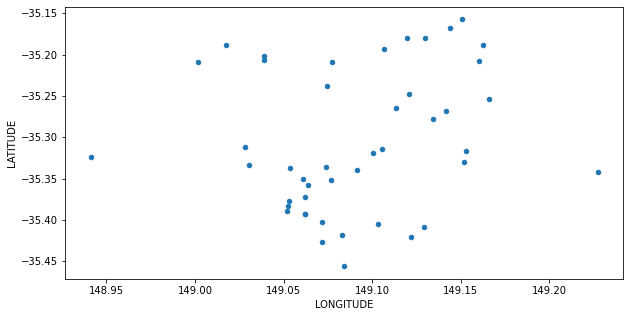

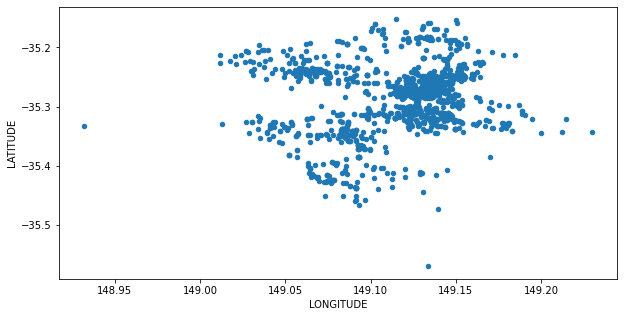

In [120]:
basketball_data.plot.scatter("LONGITUDE", "LATITUDE") and Cyclist_Crashes_data.plot.scatter("LONGITUDE", "LATITUDE")



The first scatterplot shows where the basketball courts are and the second scatterplot shows where the cyclist crasehs have occured.

<AxesSubplot:>

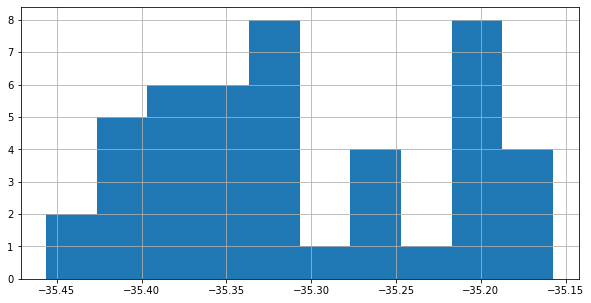

In [121]:
basketball_data["LATITUDE"].hist()

<AxesSubplot:>

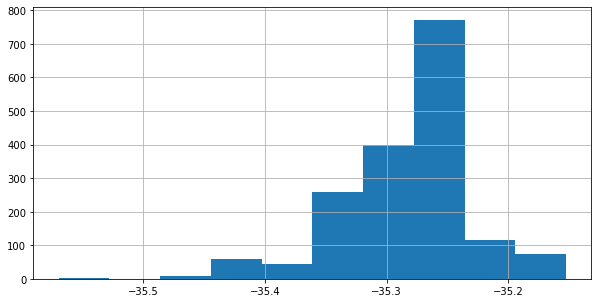

In [122]:
Cyclist_Crashes_data["LATITUDE"].hist()

Text(0, 0.5, 'Number of Casualties')

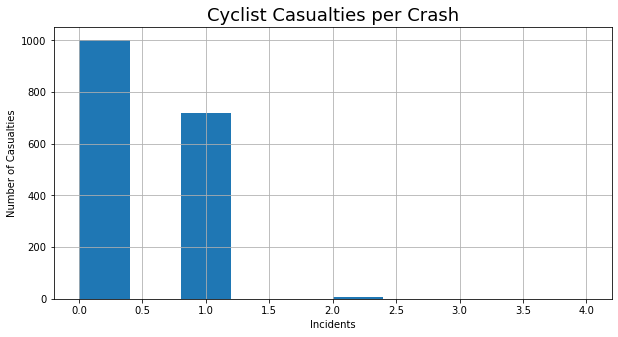

In [123]:
Cyclist_Crashes_data["CYCLIST_CASUALTIES"].hist()

plt.title("Cyclist Casualties per Crash", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

This graph shows that most cyclist crashes usuallly involve 1 or less person and that it'll be rare to involve 2 casualties.

In [124]:
Cyclist_Crashes_data.groupby(pd.Grouper(key="CRASH_DATE")).mean()

,CRASH_ID,CYCLISTS,CYCLIST_CASUALTIES,LATITUDE,LONGITUDE
CRASH_DATE,,,,,
02 August 2019,1212158.0,1.0,1.0,-35.272927,149.135539
26 July 2019,1212104.5,1.0,0.5,-35.272886,149.133298
15 July 2018,1188323.0,1.0,0.0,-35.312936,149.082802
19 July 2018,1188961.0,1.0,0.0,-35.263355,149.135571
16 December 2019,1221090.0,1.0,0.0,-35.261346,149.133405
...,...,...,...,...,...
22 June 2018,1187118.0,1.0,0.5,-35.255578,149.137340
27 June 2018,1186930.0,1.0,1.0,-35.218244,149.130995
19 June 2018,1187169.0,1.0,0.0,-35.260263,149.130629


The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

In [125]:
Cyclist_Crashes_data["CRASH_DATE"].hist()

plt.title("Crashes per Year", fontsize=18)
plt.xlabel("Year", fontsize=1)
plt.ylabel("Number of Crashes", fontsize=1)

Text(0, 0.5, 'Number of Crashes')

This historgram shows the amount of cyclist crashes per year

<AxesSubplot:>

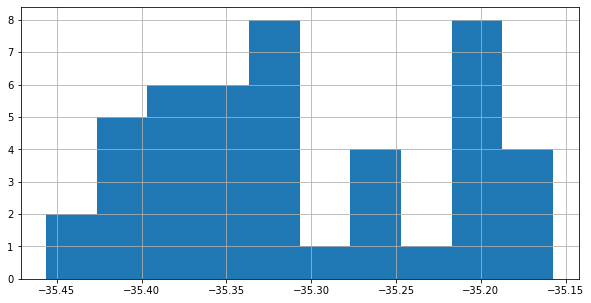

In [ ]:
basketball_data.LATITUDE[basketball_data.LATITUDE < 149.10].hist() 

Number of Courts that are on the left half of ACT

<AxesSubplot:>

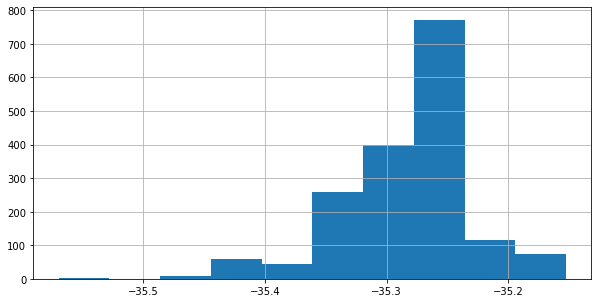

In [ ]:
Cyclist_Crashes_data.LATITUDE[Cyclist_Crashes_data.LATITUDE < 149.10].hist() 

<AxesSubplot:>

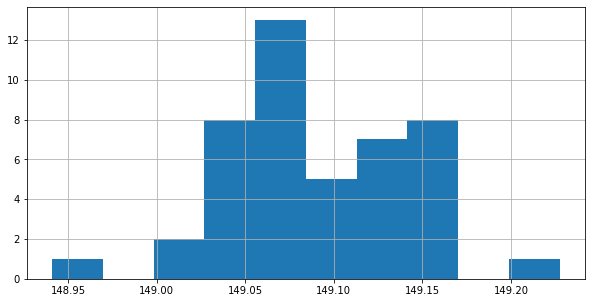

In [ ]:
basketball_data["LONGITUDE"][basketball_data["LATITUDE"] < -30].hist()

Let's see what's under $1000

<AxesSubplot:>

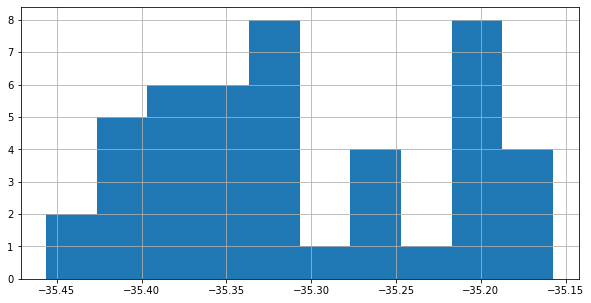

In [ ]:
basketball_data["LATITUDE"][basketball_data["LATITUDE"] < -20].hist()

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(10000)

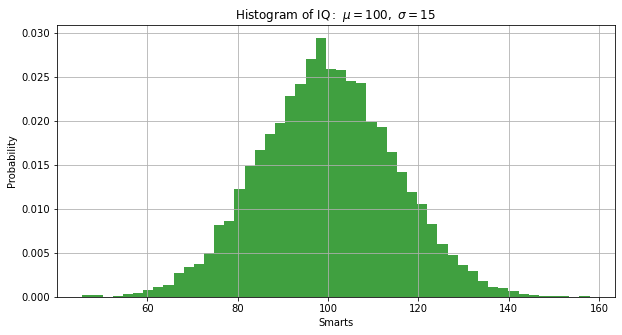

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
plt.grid(True)
# plt.show()

Here's how we made our histogram before:

In [ ]:
basketball_data["FACE_VALUE"][basketball_data["FACE_VALUE"] < 1000].hist()

KeyError: 'FACE_VALUE'

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using matpolotlib directly:

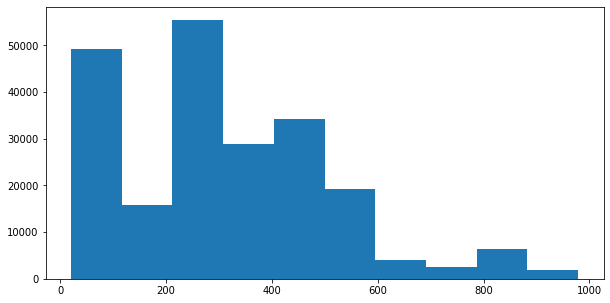

In [ ]:
capped_face_value_data = basketball_data["FACE_VALUE"][basketball_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

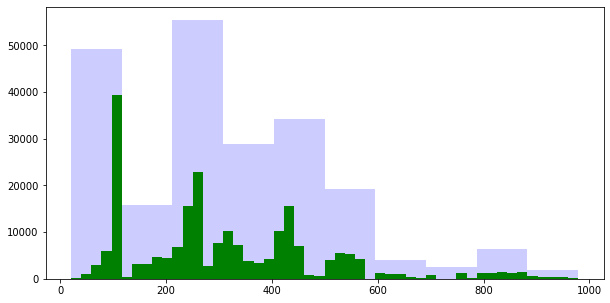

In [ ]:
capped_face_value_data = basketball_data["FACE_VALUE"][basketball_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

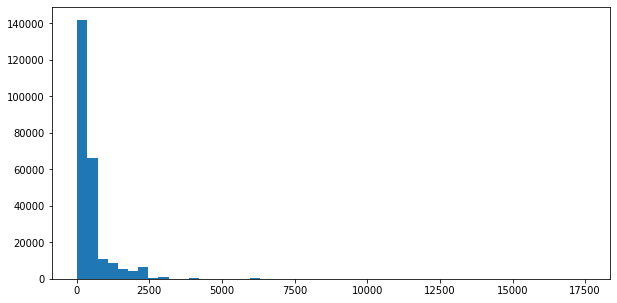

In [ ]:
plt.hist(basketball_data["FACE_VALUE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

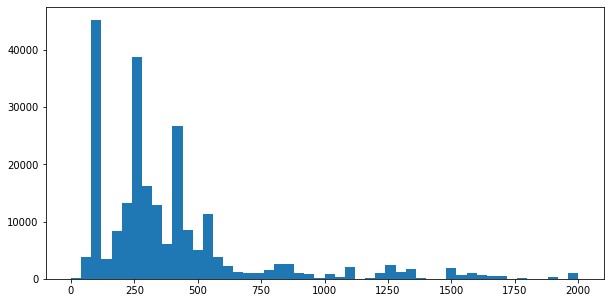

In [ ]:
plt.hist(basketball_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

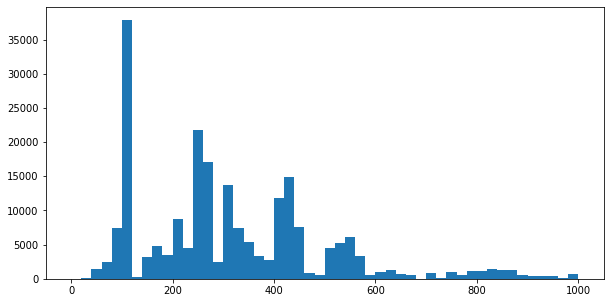

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(basketball_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

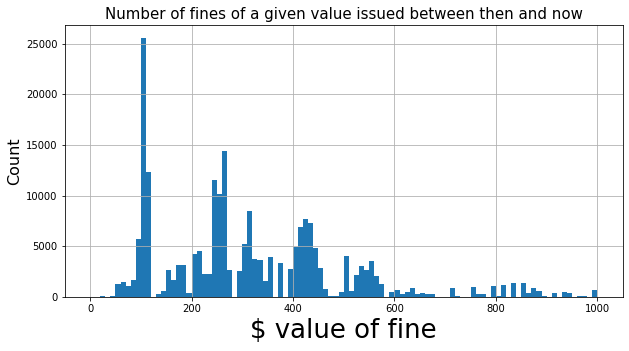

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(basketball_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=16)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
basketball_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
basketball_data.head(2)

,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
f"range is: {basketball_data.OFFENCE_MONTH.min()} to {basketball_data.OFFENCE_MONTH.max()}"

'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(basketball_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date   = datetime.strftime(basketball_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

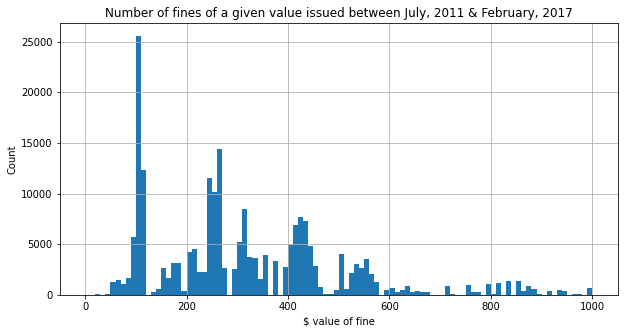

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(basketball_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title(f"Number of fines of a given value issued between {earliest_date} & {latest_date}", fontsize=12)
plt.xlabel('$ value of fine', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True)
plt.show()

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

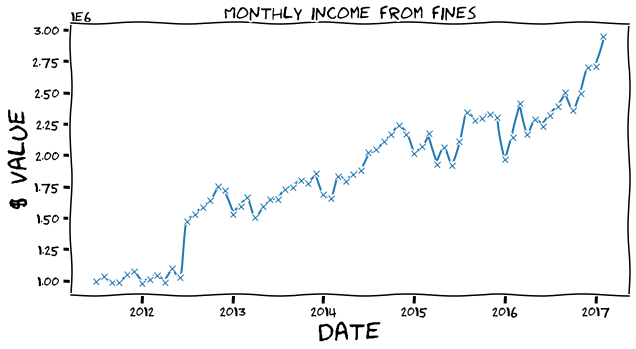

In [ ]:
income = basketball_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [ ]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = basketball_data.loc[:5]

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)

<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1,1
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,Y,NaN,NaN,NaN,78,20670,1,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day

ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,46,16238,1,1,1


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,46,16238,1,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

basketball_data["nice_day"] = basketball_data.apply(my_f, axis=1)
basketball_data.nice_day.value_counts().plot(kind="bar")

AttributeError: 'Series' object has no attribute 'OFFENCE_MONTH'

And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_